<a href="https://colab.research.google.com/github/pedroogaab/AI-Alorithms/blob/main/AC1_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AC \#1**: Inteligência Artificial
Facens - Sorocaba

Prof. Adson Nogueira Alves

E-mail adson.alves@facens.br



In [1]:
# TODO: RA & Name
print('210199: ' + 'Pedro Gabriel dos Santos')

210199: Pedro Gabriel dos Santos


## Objetivo: Prever as taxas de mortalidade por câncer para os condados dos EUA.

Explore alternativas de **regressão linear** e desenvolva o melhor modelo possível para os problemas, evitando o overfitting. Em particular, preveja a **TARGET_deathRate** a partir de seus atributos.

## Conjunto de Dados

Esses dados foram agregados de várias fontes, incluindo o American Community Survey (census.gov), clinicaltrials.gov e cancer.gov.

O conjunto de dados contém a taxa de mortalidade e os atributos de 3.047 condados.

Informações do Conjunto de Dados: Você deve respeitar a seguinte divisão treino/teste: 2042 exemplos de treino e 305 exemplos de teste.

Existem 33 atributos, conforme segue:

Dicionário de Dados

1: avgAnnCount: Número médio de casos reportados de câncer diagnosticados anualmente (a)

2: avgDeathsPerYear: Número médio de mortes reportadas devido ao câncer (a)

3: incidenceRate: Taxa média de diagnósticos de câncer per capita (100.000) (a)

4: medianIncome: Renda média por condado (b)

5: popEst2015: População do condado (b)

6: povertyPercent: Percentual da população em situação de pobreza (b)

7: studyPerCap: Número per capita de ensaios clínicos relacionados ao câncer por condado (a)

8: binnedInc: Renda média per capita agrupada por decil (b)

9: MedianAge: Idade média dos residentes do condado (b)

10: MedianAgeMale: Idade média dos residentes masculinos do condado (b)

11: MedianAgeFemale: Idade média dos residentes femininos do condado (b)

12: Geography: Nome do condado (b)

13: AvgHouseholdSize: Tamanho médio dos lares no condado (b)

14: PercentMarried: Percentual de residentes do condado casados (b)

15: PctNoHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o ensino médio ou menos (b)

16: PctHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de ensino médio (b)

17: PctSomeCol18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram algum nível de educação universitária (b)

18: PctBachDeg18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de bacharel (b)

19: PctHS25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de ensino médio (b)

20: PctBachDeg25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de bacharel (b)

21: PctEmployed16_Over: Percentual de residentes do condado com idades acima de 16 anos empregados (b)

22: PctUnemployed16_Over: Percentual de residentes do condado com idades acima de 16 anos desempregados (b)

23: PctPrivateCoverage: Percentual de residentes do condado com cobertura de saúde privada (b)

24: PctPrivateCoverageAlone: Percentual de residentes do condado com cobertura de saúde privada apenas (sem assistência pública) (b)

25: PctEmpPrivCoverage: Percentual de residentes do condado com cobertura de saúde privada fornecida por empregador (b)

26: PctPublicCoverage: Percentual de residentes do condado com cobertura de saúde pública (b)

27: PctPubliceCoverageAlone: Percentual de residentes do condado com cobertura de saúde pública apenas (b)

28: PctWhite: Percentual de residentes do condado que se identificam como brancos (b)

29: PctBlack: Percentual de residentes do condado que se identificam como negros (b)

30: PctAsian: Percentual de residentes do condado que se identificam como asiáticos (b)

31: PctOtherRace: Percentual de residentes do condado que se identificam como pertencentes a outras etnias que não brancos, negros ou asiáticos (b)

32: PctMarriedHouseholds: Percentual de lares casados (b)

33: BirthRate: Número de nascimentos vivos relativo ao número de mulheres no condado (b)

TARGET_deathRate: Variável dependente. Taxa média de mortalidade por câncer per capita (100.000) (a)

(a): anos de 2010 a 2016

(b): Estimativas do Censo de 2013

Os dados estão disponíveis em:

treino: https://docs.google.com/spreadsheets/d/1mglppL3qIhx5Osp2wsoENN3HPnGpzkcaFpw7i9nsTvQ/edit?usp=sharing

teste: https://docs.google.com/spreadsheets/d/1AuNcBH2c7hDEE1WScZIcbiH16fTr66C19S29d5uGnfo/edit?usp=sharing

## Atividades

1. (5 pontos) Realize a Regressão Linear. Você deve implementar alguma solução e compará-la com o sklearn.linear_model.SGDRegressor (modelo linear ajustado minimizando uma perda empírica regularizada com SGD, http://scikit-learn.org).

**Nota: Alguns fatores a considerar: Existem outliers? Há valores faltantes? Como você lidará com variáveis categóricas?**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from collections import Counter

In [4]:
df_test = pd.read_csv("/content/drive/MyDrive/ac1_inteligencia_artificial/data/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/ac1_inteligencia_artificial/data/train.csv")
print(df_test.dtypes, df_train.dtypes)

avganncount                float64
avgdeathsperyear             int64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
avghouseholdsize           float64
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [5]:
display(df_test[['binnedinc', 'geography']])
display(df_train[['binnedinc', 'geography']])

,binnedinc,geography
0,"(54545.6, 61494.5]","Fillmore County, Nebraska"
1,"(45201, 48021.6]","St. Joseph County, Indiana"
2,"(51046.4, 54545.6]","Midland County, Michigan"
3,"(51046.4, 54545.6]","Franklin County, Massachusetts"
4,"(40362.7, 42724.4]","Hocking County, Ohio"
...,...,...
300,"(51046.4, 54545.6]","Livingston County, Illinois"
301,"(48021.6, 51046.4]","Gage County, Nebraska"
302,"(61494.5, 125635]","Broomfield County, Colorado"
303,"(45201, 48021.6]","Winnebago County, Illinois"


,binnedinc,geography
0,"(37413.8, 40362.7]","Mineral County, West Virginia"
1,"(51046.4, 54545.6]","Muscatine County, Iowa"
2,"(54545.6, 61494.5]","Monroe County, Michigan"
3,"(40362.7, 42724.4]","Bland County, Virginia"
4,"(45201, 48021.6]","Steuben County, New York"
...,...,...
2737,"(51046.4, 54545.6]","Walsh County, North Dakota"
2738,"(54545.6, 61494.5]","Lake County, Ohio"
2739,"(61494.5, 125635]","Nantucket County, Massachusetts"
2740,"(45201, 48021.6]","Atchison County, Missouri"


In [6]:
df_geography = pd.concat([df_train['geography'], df_test['geography']]).unique()
cities = Counter(df_geography)
values = cities.values()
if any(v != 1 for v in values):
    print("There are similar city in df")
else: print("all cities are different")

all cities are different


In [7]:
states = []
for state in df_geography:
    state = state.split(',')[1]
    states.append(state.strip())
states = Counter(states)
states

Counter({'West Virginia': 55,
         'Iowa': 99,
         'Michigan': 83,
         'Virginia': 125,
         'New York': 62,
         'Kentucky': 120,
         'Missouri': 115,
         'Florida': 66,
         'Texas': 233,
         'Oklahoma': 77,
         'Illinois': 102,
         'Pennsylvania': 67,
         'Georgia': 155,
         'New Mexico': 32,
         'North Dakota': 51,
         'Louisiana': 64,
         'New Jersey': 21,
         'Kansas': 102,
         'Nebraska': 80,
         'Minnesota': 87,
         'South Dakota': 59,
         'Tennessee': 95,
         'North Carolina': 99,
         'Wyoming': 23,
         'South Carolina': 46,
         'Idaho': 42,
         'Arkansas': 75,
         'Alabama': 63,
         'California': 57,
         'Alaska': 18,
         'Colorado': 60,
         'Massachusetts': 14,
         'Maryland': 24,
         'Arizona': 15,
         'Ohio': 87,
         'Nevada': 17,
         'New Hampshire': 10,
         'Oregon': 36,
         'Connecticut'

In [8]:
df_train['geography'] = df_train['geography'].apply(lambda x: x.split(',')[1].strip())
df_test['geography'] = df_test['geography'].apply(lambda x: x.split(',')[1].strip())

# df_test = df_test.drop('geography', axis=1)
# df_train = df_train.drop('geography', axis=1)

In [9]:
# geography normalization to numbers
df_geography = pd.concat([df_train['geography'], df_test['geography']], ignore_index=True)

le = LabelEncoder()
le.fit(df_geography)

df_train['geography'] = le.transform(df_train['geography'])
df_test['geography'] = le.transform(df_test['geography'])

In [10]:
print(Counter(df_test['geography']))
print(Counter(df_train['geography']))

Counter({43: 20, 15: 19, 10: 16, 13: 15, 14: 13, 35: 13, 46: 13, 49: 12, 25: 12, 41: 11, 36: 11, 22: 9, 24: 9, 3: 9, 23: 8, 18: 8, 42: 8, 17: 8, 33: 8, 26: 7, 27: 6, 5: 6, 0: 6, 16: 5, 31: 4, 48: 4, 1: 4, 30: 3, 4: 3, 38: 3, 34: 3, 47: 3, 9: 3, 12: 3, 21: 2, 40: 2, 7: 2, 29: 2, 50: 2, 32: 2, 19: 1, 39: 1, 20: 1, 44: 1, 11: 1, 2: 1, 6: 1, 37: 1})
Counter({43: 213, 10: 139, 46: 112, 17: 112, 25: 103, 16: 97, 33: 91, 13: 87, 42: 87, 15: 80, 23: 79, 14: 79, 22: 74, 27: 74, 35: 74, 24: 73, 36: 66, 3: 66, 38: 64, 9: 63, 32: 60, 49: 60, 0: 57, 18: 56, 4: 54, 5: 54, 48: 51, 34: 48, 41: 48, 40: 44, 26: 41, 12: 39, 47: 36, 37: 35, 31: 28, 44: 26, 20: 23, 50: 21, 30: 18, 28: 17, 19: 15, 1: 14, 2: 14, 45: 14, 21: 12, 29: 8, 6: 7, 39: 4, 11: 3, 8: 1, 7: 1})


In [11]:
def mean_value(interval_str):

    interval_str = str(interval_str).strip()
    clean_str = interval_str.replace("(", "").replace(")", "").replace("[", "").replace("]", "").replace(" ", "")

    parts = clean_str.split(",")
    if len(parts) == 2 and parts[0] and parts[1]:
        lower = float(parts[0])
        upper = float(parts[1])
        return (lower + upper) / 2

    clean_str = ''.join(c for c in clean_str if c.isdigit() or c == '.')
    if clean_str:
        return float(clean_str)

def diference_value(interval_str):

    interval_str = str(interval_str).strip()
    clean_str = interval_str.replace("(", "").replace(")", "").replace("[", "").replace("]", "").replace(" ", "")

    parts = clean_str.split(",")
    if len(parts) == 2 and parts[0] and parts[1]:
        lower = float(parts[0])
        upper = float(parts[1])
        return upper-lower


df_train['binnedinc'] = df_train['binnedinc'].apply(diference_value)
df_test['binnedinc'] = df_test['binnedinc'].apply(diference_value)


In [12]:
display(df_test['binnedinc'])
display(df_train['binnedinc'])

,binnedinc
0,6948.9
1,2820.6
2,3499.2
3,3499.2
4,2361.7
...,...
300,3499.2
301,3024.8
302,64140.5
303,2820.6


,binnedinc
0,2948.9
1,3499.2
2,6948.9
3,2361.7
4,2820.6
...,...
2737,3499.2
2738,6948.9
2739,64140.5
2740,2820.6


In [13]:
df = pd.concat([df_test,df_train],axis=0)
df

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,37.0,15,423.8,54556,5619,10.1,0.000000,6948.9,47.5,46.2,...,44.2,31.9,12.7,97.191504,0.912761,0.017553,1.000527,53.409091,6.001847,150.3
1,1337.0,550,459.6,46388,268441,17.2,972.280687,2820.6,36.5,35.3,...,50.0,30.2,17.1,79.528599,12.921428,2.013126,2.037074,46.380079,5.453791,180.3
2,436.0,160,438.7,51629,83632,11.9,0.000000,3499.2,40.9,39.7,...,53.6,31.9,13.4,93.654932,1.381182,2.330671,0.611069,55.876491,5.762837,154.4
3,387.0,149,413.9,53953,70601,12.0,84.984632,3499.2,45.1,43.8,...,50.4,40.1,19.0,93.884235,1.295963,1.626279,0.833521,44.848023,3.458754,153.9
4,167.0,75,460.6,42374,28491,17.5,35.098803,2361.7,42.6,42.1,...,42.5,39.7,21.6,97.423394,0.819672,0.335478,0.103756,53.903574,5.314640,205.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,66.0,26,403.7,51754,10897,10.9,0.000000,3499.2,45.4,44.1,...,44.0,32.9,12.8,90.413448,0.245343,0.517946,5.815538,52.525867,5.591613,141.0
2738,1415.0,558,483.8,58697,229245,8.9,235.555846,6948.9,43.2,41.6,...,56.8,28.7,13.6,92.552204,3.702106,1.268322,0.535659,50.142910,4.694264,182.5
2739,64.0,16,572.8,82596,10925,7.1,0.000000,64140.5,39.5,38.0,...,42.0,32.5,17.1,85.704812,9.425919,1.136794,1.913604,44.940097,4.179364,146.9
2740,34.0,21,372.9,45997,5306,12.2,0.000000,2820.6,47.1,45.3,...,39.8,34.3,13.7,97.886029,0.294118,0.863971,0.018382,49.060376,7.641509,222.4


In [14]:
# correlation_matrix = df.corr(numeric_only=True)

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()


In [15]:
# cor_target = correlation_matrix['target_deathrate'].sort_values(ascending=False)

# relevant_columns = cor_target[abs(cor_target) >= 0.16].index.tolist()
# relevant_columns = [col for col in relevant_columns if col != 'target_deathrate']

# df = df[relevant_columns + ['target_deathrate']]
# df

In [16]:
print(df.dtypes)
df.info()

avganncount                float64
avgdeathsperyear             int64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                  float64
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                    int64
avghouseholdsize           float64
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [17]:
df = df.drop('pctsomecol18_24', axis=1)
df = df.fillna(df.mean(numeric_only=True))

df_train = df_train[df.columns.intersection(df_train.columns)]
df_test = df_test[df.columns.intersection(df_test.columns)]

df_train = df_train.fillna(df_train.mean(numeric_only=True))
df_test = df_test.fillna(df_test.mean(numeric_only=True))

# df_train = df_train.dropna()
# df_test = df_test.dropna()

In [18]:
df_train = df_train[df.columns.intersection(df_train.columns)]
df_test = df_test[df.columns.intersection(df_test.columns)]


In [19]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('target_deathrate')

In [20]:
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before_high = (df_capped[col] > upper_bound).sum()
        before_low = (df_capped[col] < lower_bound).sum()

        df_capped.loc[df_capped[col] > upper_bound, col] = upper_bound
        df_capped.loc[df_capped[col] < lower_bound, col] = lower_bound

        print(f'{col}: {before_low + before_high} valores capados (↑ {before_high}, ↓ {before_low})')
    return df_capped


df_train = cap_outliers_iqr(df_train, numeric_cols)
df_test = cap_outliers_iqr(df_test, numeric_cols)

avganncount: 418 valores capados (↑ 418, ↓ 0)
avgdeathsperyear: 313 valores capados (↑ 313, ↓ 0)
incidencerate: 81 valores capados (↑ 18, ↓ 63)
medincome: 109 valores capados (↑ 109, ↓ 0)
popest2015: 368 valores capados (↑ 368, ↓ 0)
povertypercent: 62 valores capados (↑ 62, ↓ 0)
studypercap: 452 valores capados (↑ 452, ↓ 0)
binnedinc: 271 valores capados (↑ 271, ↓ 0)
medianage: 81 valores capados (↑ 49, ↓ 32)
medianagemale: 72 valores capados (↑ 39, ↓ 33)
medianagefemale: 61 valores capados (↑ 22, ↓ 39)
geography: 0 valores capados (↑ 0, ↓ 0)
avghouseholdsize: 160 valores capados (↑ 110, ↓ 50)
percentmarried: 66 valores capados (↑ 3, ↓ 63)
pctnohs18_24: 59 valores capados (↑ 59, ↓ 0)
pcths18_24: 46 valores capados (↑ 34, ↓ 12)
pctbachdeg18_24: 87 valores capados (↑ 87, ↓ 0)
pcths25_over: 29 valores capados (↑ 2, ↓ 27)


<ipython-input-20-5b570c10b3e5>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '335.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper_bound, col] = upper_bound
<ipython-input-20-5b570c10b3e5>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72840.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper_bound, col] = upper_bound
<ipython-input-20-5b570c10b3e5>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '156320.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper_bound, col] = upper_bound
<ipython-input-20-5b5

pctbachdeg25_over: 71 valores capados (↑ 71, ↓ 0)
pctemployed16_over: 33 valores capados (↑ 2, ↓ 31)
pctunemployed16_over: 68 valores capados (↑ 68, ↓ 0)
pctprivatecoverage: 18 valores capados (↑ 0, ↓ 18)
pctprivatecoveragealone: 59 valores capados (↑ 28, ↓ 31)
pctempprivcoverage: 10 valores capados (↑ 8, ↓ 2)
pctpubliccoverage: 19 valores capados (↑ 12, ↓ 7)
pctpubliccoveragealone: 34 valores capados (↑ 32, ↓ 2)
pctwhite: 153 valores capados (↑ 2, ↓ 151)
pctblack: 338 valores capados (↑ 338, ↓ 0)
pctasian: 288 valores capados (↑ 288, ↓ 0)
pctotherrace: 270 valores capados (↑ 270, ↓ 0)
pctmarriedhouseholds: 91 valores capados (↑ 25, ↓ 66)
birthrate: 146 valores capados (↑ 119, ↓ 27)
avganncount: 40 valores capados (↑ 40, ↓ 0)
avgdeathsperyear: 34 valores capados (↑ 34, ↓ 0)
incidencerate: 10 valores capados (↑ 4, ↓ 6)
medincome: 8 valores capados (↑ 8, ↓ 0)
popest2015: 38 valores capados (↑ 38, ↓ 0)
povertypercent: 6 valores capados (↑ 6, ↓ 0)
studypercap: 48 valores capados (↑ 48, ↓ 0

<ipython-input-20-5b570c10b3e5>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '276.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper_bound, col] = upper_bound
<ipython-input-20-5b570c10b3e5>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75054.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper_bound, col] = upper_bound
<ipython-input-20-5b570c10b3e5>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '144881.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper_bound, col] = upper_bound
<ipython-input-20-5b570

pctbachdeg25_over: 9 valores capados (↑ 9, ↓ 0)
pctemployed16_over: 3 valores capados (↑ 1, ↓ 2)
pctunemployed16_over: 4 valores capados (↑ 4, ↓ 0)
pctprivatecoverage: 4 valores capados (↑ 0, ↓ 4)
pctprivatecoveragealone: 1 valores capados (↑ 0, ↓ 1)
pctempprivcoverage: 0 valores capados (↑ 0, ↓ 0)
pctpubliccoverage: 1 valores capados (↑ 0, ↓ 1)
pctpubliccoveragealone: 5 valores capados (↑ 5, ↓ 0)
pctwhite: 23 valores capados (↑ 0, ↓ 23)
pctblack: 48 valores capados (↑ 48, ↓ 0)
pctasian: 37 valores capados (↑ 37, ↓ 0)
pctotherrace: 29 valores capados (↑ 29, ↓ 0)
pctmarriedhouseholds: 11 valores capados (↑ 2, ↓ 9)
birthrate: 18 valores capados (↑ 14, ↓ 4)


In [21]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              2742 non-null   float64
 1   avgdeathsperyear         2742 non-null   float64
 2   incidencerate            2742 non-null   float64
 3   medincome                2742 non-null   float64
 4   popest2015               2742 non-null   float64
 5   povertypercent           2742 non-null   float64
 6   studypercap              2742 non-null   float64
 7   binnedinc                2742 non-null   float64
 8   medianage                2742 non-null   float64
 9   medianagemale            2742 non-null   float64
 10  medianagefemale          2742 non-null   float64
 11  geography                2742 non-null   float64
 12  avghouseholdsize         2742 non-null   float64
 13  percentmarried           2742 non-null   float64
 14  pctnohs18_24            

(None, None)

In [22]:
X_train = df_train.drop('target_deathrate', axis=1)
y_train = df_train['target_deathrate']

X_test = df_test.drop('target_deathrate', axis=1)
y_test = df_test['target_deathrate']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2742, 32) (2742,)
(305, 32) (305,)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Remove Outliers in data test and train and train

### SGDRegressor

In [24]:
sgd_temp = linear_model.SGDRegressor()
sgd_temp.fit(X_train_pca, y_train)

errors_sgd = np.abs(y_train - sgd_temp.predict(X_train_pca))
threshold_sgd = np.percentile(errors_sgd, 98)
mask_sgd = errors_sgd < threshold_sgd


In [25]:
X_train_sgd = X_train_pca[mask_sgd]
y_train_sgd = y_train[mask_sgd]

clf_sgd = linear_model.SGDRegressor()
clf_sgd.fit(X_train_sgd, y_train_sgd)
y_pred_sgd = clf_sgd.predict(X_test_pca)

In [26]:
errors_test_sgd = np.abs(y_test - y_pred_sgd)
threshold_test_sgd = np.percentile(errors_test_sgd, 98)
mask_test_sgd = errors_test_sgd < threshold_test_sgd

y_test_sgd_clean = y_test[mask_test_sgd]
y_pred_sgd_clean = y_pred_sgd[mask_test_sgd]

### Linear Regression

In [27]:
lr_temp = linear_model.LinearRegression()
lr_temp.fit(X_train_pca, y_train)
errors_lr = np.abs(y_train - lr_temp.predict(X_train_pca))
threshold_lr = np.percentile(errors_lr, 98)
mask_lr = errors_lr < threshold_lr

In [28]:
X_train_lr = X_train_pca[mask_lr]
y_train_lr = y_train[mask_lr]

clf_lr = linear_model.LinearRegression()
clf_lr.fit(X_train_lr, y_train_lr)
y_pred_lr = clf_lr.predict(X_test_pca)

In [29]:
errors_test_lr = np.abs(y_test - y_pred_lr)
threshold_test_lr = np.percentile(errors_test_lr, 98)
mask_test_lr = errors_test_lr < threshold_test_lr

y_test_lr_clean = y_test[mask_test_lr]
y_pred_lr_clean = y_pred_lr[mask_test_lr]

In [30]:
results = {
    'SGDRegressor': {
        'mse': mean_squared_error(y_test, y_pred_sgd),
        'mae': mean_absolute_error(y_test, y_pred_sgd),
        'r2': r2_score(y_test, y_pred_sgd)
    },
    'LinearRegression': {
        'mse': mean_squared_error(y_test, y_pred_lr),
        'mae': mean_absolute_error(y_test, y_pred_lr),
        'r2': r2_score(y_test, y_pred_lr)
}
}
df_results = pd.DataFrame(results).T
df_results

,mse,mae,r2
SGDRegressor,468.222487,15.408421,0.397245
LinearRegression,460.607466,15.501000,0.407048


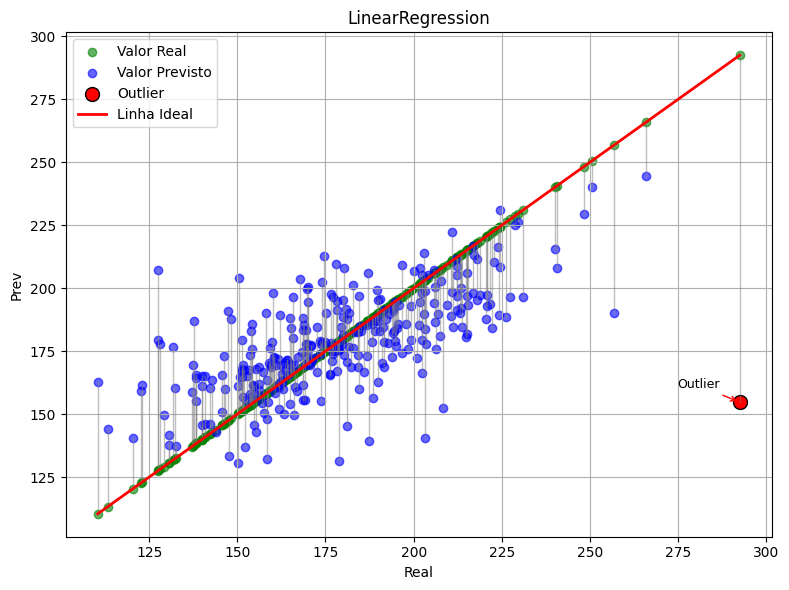

In [31]:
y_test = pd.Series(y_test, name='y_test')
y_pred_LR = pd.Series(y_pred_lr, index=y_test.index, name='y_pred')

plt.figure(figsize=(8, 6))


residuals = y_test - y_pred_LR
residuals_abs = np.abs(residuals)

idx_outlier = residuals_abs.idxmax()

for real, pred in zip(y_test, y_pred_LR):
    plt.plot([real, real], [real, pred], color='gray', linewidth=1, alpha=0.5)

plt.scatter(y_test, y_test, color='green', label='Valor Real', alpha=0.6)
plt.scatter(y_test, y_pred_LR, color='blue', label='Valor Previsto', alpha=0.6)
plt.scatter(y_test.loc[idx_outlier], y_pred_LR.loc[idx_outlier],
            color='red', s=100, edgecolor='black', label='Outlier')
plt.annotate("Outlier",
             (y_test.loc[idx_outlier], y_pred_LR.loc[idx_outlier]),
             textcoords="offset points", xytext=(-30,10), ha='center', fontsize=9,
             arrowprops=dict(arrowstyle='->', color='red'))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linewidth=2, label='Linha Ideal')
plt.title('LinearRegression')
plt.xlabel('Real')
plt.ylabel('Prev')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




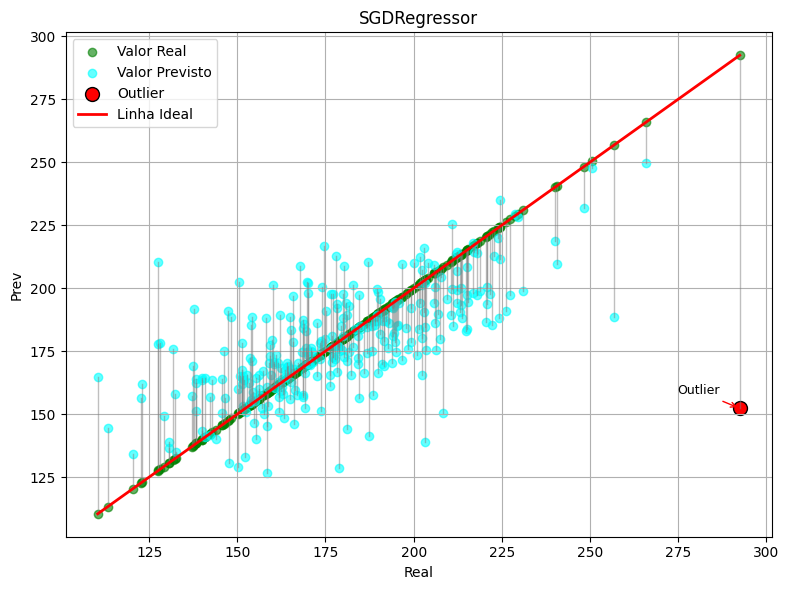

In [32]:
y_test = pd.Series(y_test, name='y_test')
y_pred_SDG = pd.Series(y_pred_sgd, index=y_test.index, name='y_pred')

plt.figure(figsize=(8, 6))


residuals = y_test - y_pred_SDG
residuals_abs = np.abs(residuals)

idx_outlier = residuals_abs.idxmax()

for real, pred in zip(y_test, y_pred_SDG):
    plt.plot([real, real], [real, pred], color='gray', linewidth=1, alpha=0.5)

plt.scatter(y_test, y_test, color='green', label='Valor Real', alpha=0.6)
plt.scatter(y_test, y_pred_SDG, color='cyan', label='Valor Previsto', alpha=0.6)
plt.scatter(y_test.loc[idx_outlier], y_pred_SDG.loc[idx_outlier],
            color='red', s=100, edgecolor='black', label='Outlier')
plt.annotate("Outlier",
             (y_test.loc[idx_outlier], y_pred_SDG.loc[idx_outlier]),
             textcoords="offset points", xytext=(-30,10), ha='center', fontsize=9,
             arrowprops=dict(arrowstyle='->', color='red'))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linewidth=2, label='Linha Ideal')
plt.title('SGDRegressor')
plt.xlabel('Real')
plt.ylabel('Prev')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




## Conclusões Atividade 1

Quais são as conclusões? (1-2 parágrafos)




Os resultados mostram que o modelo LinearRegression apresentou desempenho ligeiramente melhor que o SGDRegressor, com valores menores de MSE e MAE, além de um R² mais alto. Essa diferença pode estar relacionada ao tamanho reduzido do conjunto de dados, o que favorece a LinearRegression, que calcula a solução ótima de forma exata por mínimos quadrados. Já o SGDRegressor, que utiliza gradiente descendente estocástico, pode não convergir adequadamente sem ajustes finos em hiperparâmetros, como taxa de aprendizado ou número de iterações.

Outro fator crítico é a sensibilidade a outliers: o SGDRegressor tende a ser mais afetado por valores atípicos, especialmente sem técnicas de normalização ou regularização. A Regressão Linear, por outro lado, demonstrou maior robustez nesse cenário específico, possivelmente por minimizar o erro quadrático de forma direta. Em conjuntos maiores ou com alta dimensionalidade, o SGDRegressor poderia ser mais vantajoso, mas, neste caso, a simplicidade e eficiência da LinearRegression a tornam mais adequada.

2. (2 pontos) Utilize 3 diferentes taxas de aprendizado de Gradiente

---

Descendente (GD) ao otimizar. Compare as soluções baseadas em GD com a Equação Normal. Quais são as conclusões?
[texto do link](https://)

In [33]:
model_1 = linear_model.SGDRegressor(learning_rate='constant')
model_1.fit(X_train_sgd, y_train_sgd)
y_pred_1 = model_1.predict(X_test_pca)

model_2 = linear_model.SGDRegressor(learning_rate='optimal')
model_2.fit(X_train_sgd, y_train_sgd)
y_pred_2 = model_2.predict(X_test_pca)

model_3 = linear_model.SGDRegressor(learning_rate='invscaling')
model_3.fit(X_train_sgd, y_train_sgd)
y_pred_3 = model_3.predict(X_test_pca)

In [34]:
results = {
    'SGD - constant': {
        'mse': mean_squared_error(y_test, y_pred_1),
        'mae': mean_absolute_error(y_test, y_pred_1),
        'r2': r2_score(y_test, y_pred_1)
    },
    'SGD - optimal': {
        'mse': mean_squared_error(y_test, y_pred_2),
        'mae': mean_absolute_error(y_test, y_pred_2),
        'r2': r2_score(y_test, y_pred_2)
    },
    'SGD - invscaling': {
        'mse': mean_squared_error(y_test, y_pred_3),
        'mae': mean_absolute_error(y_test, y_pred_3),
        'r2': r2_score(y_test, y_pred_3)
    },
    'LinearRegression': {
        'mse': mean_squared_error(y_test, y_pred_lr),
        'mae': mean_absolute_error(y_test, y_pred_lr),
        'r2': r2_score(y_test, y_pred_lr)
    }

}

df_results = pd.DataFrame(results).T
display(df_results)

,mse,mae,r2
SGD - constant,493.027268,15.862476,0.365314
SGD - optimal,669.840271,19.439763,0.137698
SGD - invscaling,462.237834,15.566714,0.404950
LinearRegression,460.607466,15.501000,0.407048


3. (3 pontos) Às vezes, precisamos de uma função mais complexa para fazer boas previsões. Elabore e avalie um modelo de Regressão Linear Polinomial.


In [35]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

results = {
    'LinearRegression': {
        'mse': mean_squared_error(y_test, y_pred_poly),
        'mae': mean_absolute_error(y_test, y_pred_poly),
        'r2': r2_score(y_test, y_pred_poly)
    }
}

df_results = pd.DataFrame(results).T
display(df_results)

,mse,mae,r2
LinearRegression,422.736811,14.671421,0.4558


## Conclusões Atividades 2 e 3

Quais são as conclusões? (1-2 parágrafos)


O SGDRegressor demonstrou alta sensibilidade à escolha da taxa de aprendizado, com desempenho variando drasticamente entre configurações. Enquanto estratégias como invscaling aproximaram-se do desempenho da LinearRegression, outras configurações falharam significativamente, evidenciando a necessidade crítica de ajuste de hiperparâmetros para garantir convergência adequada. Em contraste, a LinearRegression tradicional mostrou-se estável e eficiente sem dependência de otimizações iterativas, reforçando sua vantagem em cenários com dados limitados.

Já a extensão polinomial aplicada à LinearRegression trouve melhorias perceptíveis em relação ao modelo linear simples, indicando que relações não-lineares nos dados podem ser melhor capturadas com transformações adequadas. Esse resultado contrasta com a complexidade inerente ao ajuste do SGD, sugerindo que, mesmo com técnicas simples, é possível obter ganhos significativos sem recorrer a métodos iterativos sensíveis a configurações. Em resumo, enquanto o SGD demanda atenção meticulosa em sua parametrização, a LinearRegression combinada com transformações polinomiais oferece uma alternativa robusta e menos custosa para explorar padrões complexos.

## Resultados com o Conjunto de Dados de Teste


,mse,mae,r2
LinearRegression,460.607466,15.501,0.407048


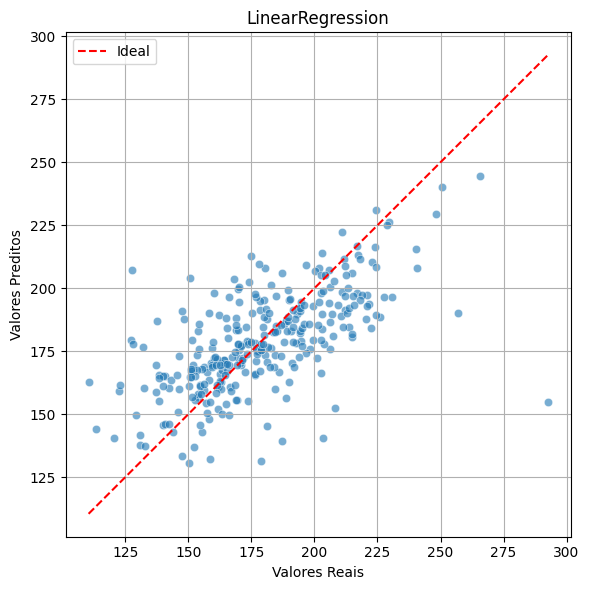

In [36]:
# seu codigo

def plot_regression(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Ideal')
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Preditos")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


result = {
    'LinearRegression': {
        'mse': mean_squared_error(y_test, y_pred_lr),
        'mae': mean_absolute_error(y_test, y_pred_lr),
        'r2': r2_score(y_test, y_pred_lr)}}

results_lr = pd.DataFrame(result).T
display(results_lr)
plot_regression(y_test, y_pred_lr, "LinearRegression")

,mse,mae,r2
SGDRegressor,468.222487,15.408421,0.397245


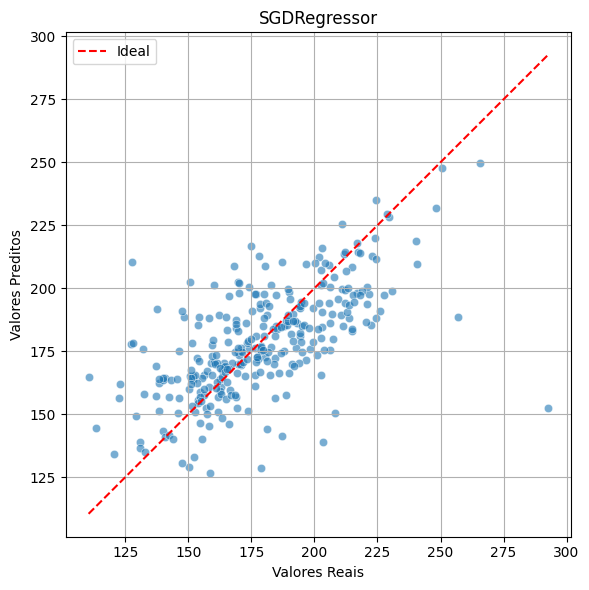

In [37]:
# Linear Model with SDGRegressor
result = {
    'SGDRegressor': {
        'mse': mean_squared_error(y_test, y_pred_sgd),
        'mae': mean_absolute_error(y_test, y_pred_sgd),
        'r2': r2_score(y_test, y_pred_sgd)}}

results_sgd = pd.DataFrame(result).T
display(results_sgd)
plot_regression(y_test, y_pred_sgd, "SGDRegressor")

,mse,mae,r2
Polynomial,422.736811,14.671421,0.4558


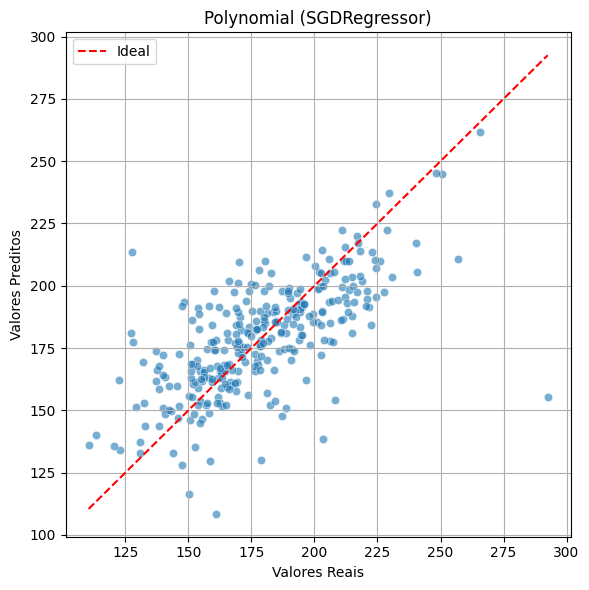

In [38]:
# Polynomial model with SDGRegressor
result = {
    'Polynomial': {
        'mse': mean_squared_error(y_test, y_pred_poly),
        'mae': mean_absolute_error(y_test, y_pred_poly),
        'r2': r2_score (y_test, y_pred_poly)}}

results_poly = pd.DataFrame(result).T
display(results_poly)
plot_regression(y_test, y_pred_poly, "Polynomial (SGDRegressor)")

## Prazo

Terça-feira, 01 de abril, às 23h59.

Política de penalização para envio atrasado: Não é encorajado o envio de sua tarefa após a data de vencimento. No entanto, caso você o faça, sua nota será penalizada da seguinte forma:

02 de abril, 23h59: nota * 0,75
03 de abril, 23h59: nota * 0,5
04 de abril, 23h59: nota * 0,25
Após: nota * 0


## Envio

Por e-mail adson.alves@facens.br, envie seu Notebook.

Esta atividade é individual.